## Importing Libraries 

In [68]:
import pandas as pd 
import numpy
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

## Importing Data 

In [2]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 'ID')

## Explore Data 

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation Estimate 

In [6]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


## Visualize Data 

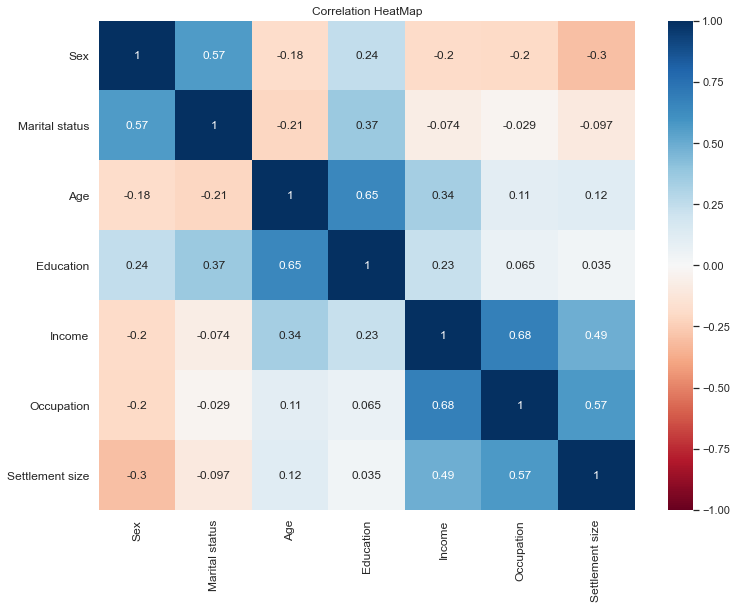

In [7]:
plt.figure(figsize = (12, 9))

s = sns.heatmap(df_segmentation.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)

plt.title('Correlation HeatMap')

plt.show()


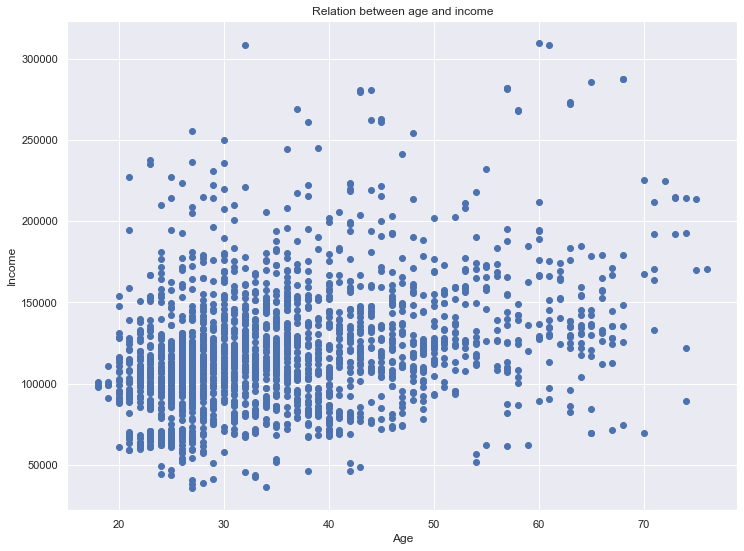

In [8]:
# Plloting a scatter for age and income 
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])

plt.xlabel('Age')
plt.ylabel('Income')

plt.title('Relation between age and income')
plt.show()

## Standardization

In [9]:
scaler = StandardScaler()

segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchical Clustring 

In [10]:
hier_clust = linkage(segmentation_std, method = 'ward')

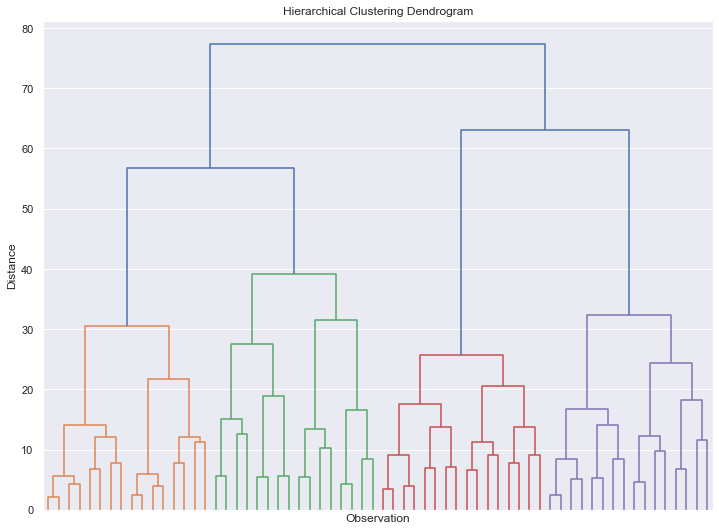

In [11]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')

dendrogram(hier_clust, show_leaf_counts = False, no_labels = True, truncate_mode = 'level', p =5)
plt.show()

## K-Means Clustering 

In [14]:
## First we determing the best number of clusters by WCSS, Kmeans ++

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)



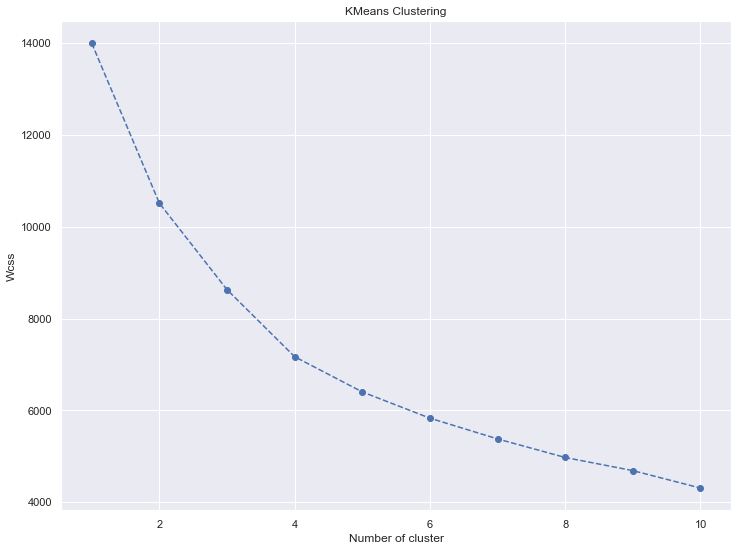

In [15]:
# Visualize the results 
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle = '--')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('KMeans Clustering')
plt.show()

#### By the elbow method the number of cluster = 4, same as we prove it in Hierarchical Clustring

In [18]:
# now perfome the KMeans clustering with 4 clusters 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [20]:
# interpret the results 
# first we add the labels coming from the kmeans clustering 
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [21]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [25]:
# creat columns for number of observations and the porportion 
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

df_segm_analysis['Porp Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [26]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Porp Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [27]:
df_segm_analysis.rename({0: 'well-off', 1: 'fewer-opportunity', 2: 'career focused', 3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Porp Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [28]:
# visualize the segmentations data by scatter plot 
# first we add the clusters labels to the data 

df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                                                                  1: 'fewer-opportunity', 
                                                                  2: 'career focused', 
                                                                  3:'standard'})

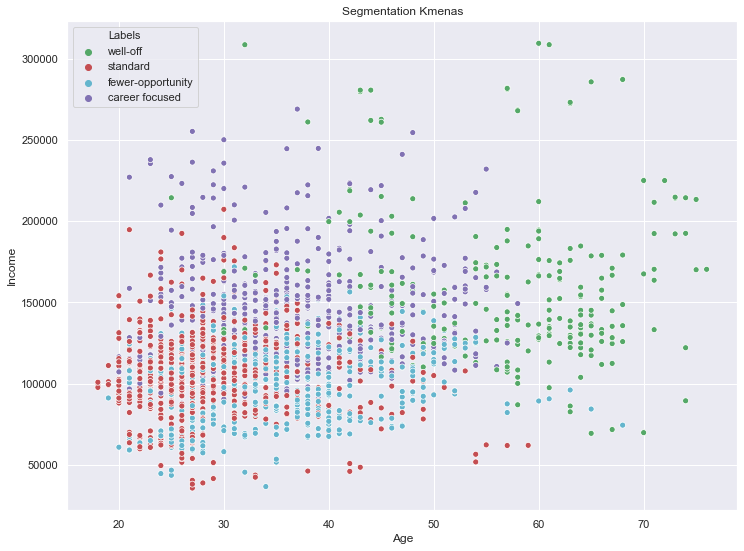

In [32]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, hue= df_segm_kmeans['Labels'], palette =['g', 'r', 'c', 'm'])
plt.title('Segmentation Kmenas')
plt.show()

## Using Principal components analysis PCA

In [34]:
pca = PCA()

In [35]:
pca.fit(segmentation_std)

PCA()

In [37]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

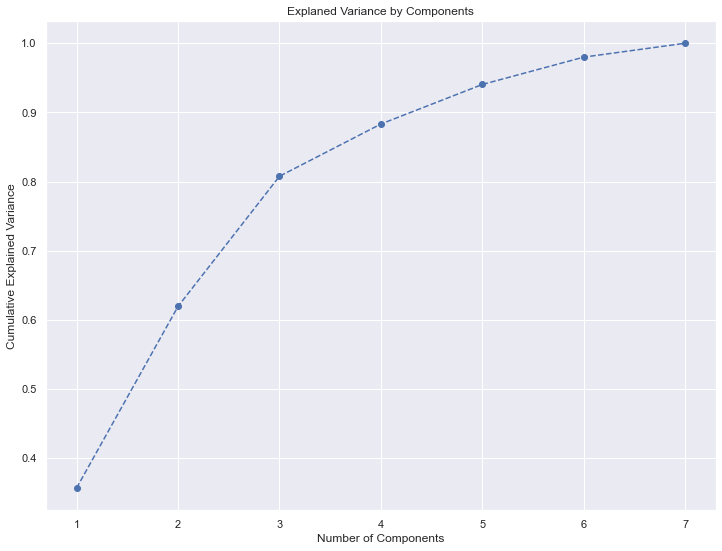

In [38]:
# Ploting the results for the explained variance ratio
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle='--' )
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explaned Variance by Components')
plt.show()

In [39]:
# we will reduce the number of components to 3 which perserving 80 of the cumulative variance 

pca = PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(n_components=3)

#### PCA Results 

In [40]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [41]:
df_pca_comp = pd.DataFrame(data= pca.components_, 
                           columns = df_segmentation.columns.values,
                           index = ['component 1', 'component 2', 'component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


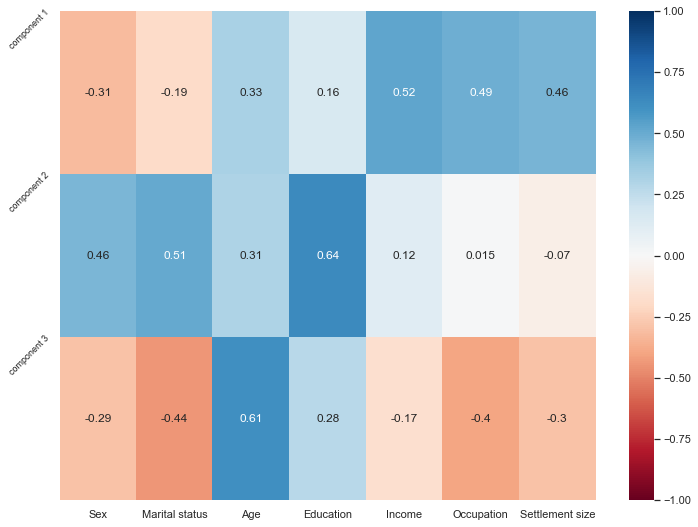

In [45]:
# ploting the resulting in a heatmap 
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp, 
            vmin = -1, vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0,1,2], ['component 1', 'component 2', 'component 3'], rotation = 45, fontsize = 9)
plt.show()


In [47]:
#  Tramsform our original data from 7D into 3D where each observation is described by the 3 component 
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [50]:
# now save the score in a new variable for clustering 
scores_pca = pca.transform(segmentation_std)

### K-Means clustering with PCA 


In [51]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

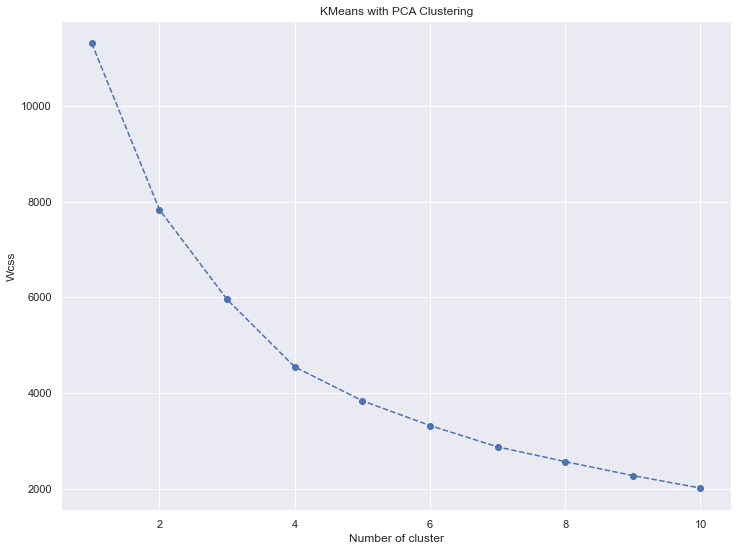

In [52]:
# Visualize the results 
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle = '--')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('KMeans with PCA Clustering')
plt.show()

In [53]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [55]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [56]:
segm_kmeans_pca = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
segm_kmeans_pca.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
segm_kmeans_pca['Segment Kmeans Pca'] = kmeans_pca.labels_

In [58]:
segm_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Kmeans Pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [59]:
segm_kmeans_pca_freq = segm_kmeans_pca.groupby(['Segment Kmeans Pca']).mean()

In [60]:
segm_kmeans_pca_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment Kmeans Pca,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [62]:
segm_kmeans_pca_freq['N Obs'] = segm_kmeans_pca[['Segment Kmeans Pca', 'Sex']].groupby(['Segment Kmeans Pca']).count()

segm_kmeans_pca_freq['Porp Obs'] = segm_kmeans_pca_freq['N Obs'] / segm_kmeans_pca_freq['N Obs'].sum()

segm_kmeans_pca_freq = segm_kmeans_pca_freq.rename({0: 'fewer-opportunity',
                                                    1: 'career focused', 
                                                    2: 'standard', 
                                                    3:'well-off'})
segm_kmeans_pca_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Porp Obs
Segment Kmeans Pca,,,,,,,,,,,,
fewer-opportunity,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
career focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
standard,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [65]:
segm_kmeans_pca['Legend'] = segm_kmeans_pca['Segment Kmeans Pca'].map({0: 'fewer-opportunity',
                                                                      1: 'career focused', 
                                                                      2: 'standard', 
                                                                      3:'well-off'})
segm_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Kmeans Pca,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,fewer-opportunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,fewer-opportunity
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,fewer-opportunity
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,standard


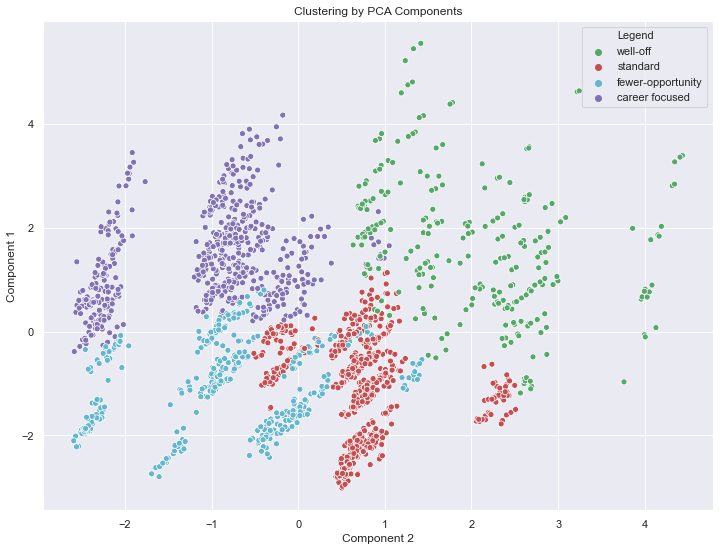

In [67]:
x_axis = segm_kmeans_pca['Component 2']
y_axis = segm_kmeans_pca['Component 1']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, hue = segm_kmeans_pca['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clustering by PCA Components')
plt.show()

## Data Export 

## now saving our variable for future use 

In [69]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [70]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [71]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))